# Assignment 3

As before, if a question can be answered with 'yes/no', or a numeric value, you may simply state as much. If you incorporate code from the internet (which is not required and generally not advisable), please cite the source within your code (providing a URL is sufficient).

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that no outside searches are required by the assignment!). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

### Question 1: Resampling via Bootstrapping

Now, we'll use the `iris` dataset, which we will add to Python using the `statsmodels` library. As always, start by reviewing a description of the dataset, by printing the dataset.

In [101]:
# Import
iris = sm.datasets.get_rdataset('iris', 'datasets')
df = pd.DataFrame(iris.data)

_(i)_ Create an `alpha_func(D, idx)` function which takes the `Sepal`'s `width` and `length` to calculate for alpha

In [102]:
# Your code here
def alpha_func(D, idx):
   cov_ = np.cov(D[['Sepal.Width','Sepal.Length']].loc[idx], rowvar=False) # https://numpy.org/doc/stable/reference/generated/numpy.cov.html
   return ((cov_[1,1] - cov_[0,1]) /
           (cov_[0,0]+cov_[1,1]-2*cov_[0,1]))

Test the code below

In [103]:
alpha_func(df, range(100))

0.6189498510165621

_(ii)_ Construct a new bootstrap data set and recompute alpha

In [104]:
rng = np.random.default_rng(0)
alpha_func(df,
           rng.choice(100,
                      100,
                      replace=True))

0.6675354865158226

Imagine we are analysts working for a shipping company. The company wants to know the average length of iris' petals, to inform space allotment on an upcoming shipment. The relevant variable in the dataset is `Sepal.Length`. 

_(iii)_ Why is it (perhaps) not sufficient to simply calculate the mean of `Sepal.Length`? What more information will preforming a bootstrap provide to us?  

_(iv)_ We can perform bootstrapping in Python by defining a simple function using `boot_SE()` for computing the bootstrap standard error. Remember, because bootstrapping involves randomness, we must first set a seed for reproducibility!

In [105]:
# Add your code here to set the seed

'''  
iii) We only have a sample of the potential lengths of all iris flowers in the world. Using a simple arithmetic mean could mean we are not capturing 
the actual distribution of iris. 
By using bootstrap, we are able to understand the variability of iris petal samples to understand variability of the average petal length 
and make decisions based on the distribution and confidence intervals of the sample data.

'''
bootstrap_values = []

def boot_SE(D, B=1000, seed=0):
    rng = np.random.default_rng(seed) # initialize random number generator
    n = D.shape[0] # number of observations in data
    for i in range(B):
        idx = rng.choice(D.index,n,replace=True) # Randomly samples n indices with replacement from df 
        value = alpha_func(D, idx) # apply function to calculate alpha
        bootstrap_values.append(value) # append result to list
        
    return np.std(np.array(bootstrap_values))


_(v)_ Evaluate the accuracy of our alpha estimate with B = 1000

In [106]:
# Your code here
''' 
v) expected value of iris petal can vary by + or - 0.031 from the sample petal mean.
'''
alpha_SE = boot_SE(D=df,
                   B=1000,
                   seed=0)
alpha_SE



0.03180510076860766

_(vi)_ What is the original mean value of `Sepal.Length`?

In [107]:
# Add your code here
'''   
vi) Original mean value = 5.843
'''
# original mean
df['Sepal.Length'].mean()


5.843333333333334

Next, let's create a new bootstrapping to bootstrap samples (boot_se_samples) of Sepal.Length, in order to compute its bootstrapped mean and standard deviation.

(vii). Write code to review the bootstrapped mean value, and the standard deviation of the bootstrapped samples. Compare the mean against its original value. Then, review the bootstrapped range, by using t_range = np.ptp(boot_se_samples).

In [117]:
''' 
vii) 
bootstrapped mean = 5.84. The bootstrapped mean is similar to the original mean of the original sample's mean.
Standard deviation of sample mean = 0.0664
The original sample data range is 3.6 and the range of the bootstrapped mean value is 0.387
'''


def boot_se_new(D, B=1000, seed=0):
    rng = np.random.default_rng(seed)  # Initialize random number generator
    n = D.shape[0]  # length of dataframe
    bootstrap_mean = []  # Initialize bootstrap mean list 
    bootstrap_samples = []  # Initialize bootstrap samples list 
    
    for i in range(B):
        idx = rng.choice(D.index, n, replace=True)  # Randomly samples n indices with replacement from df
        
        # Mean calculation
        bootstrap_sample = D.loc[idx, 'Sepal.Length']  # Get the values of the sample
        bootstrap_mean.append(bootstrap_sample.mean())  # Calculate mean of sample and append to list

        # Store bootstrapped sample in list
        bootstrap_samples.append(bootstrap_sample.tolist()) 

    bootstrap_mean_array = np.array(bootstrap_mean)

    # Calculate mean of overall sample
    mean_value = np.mean(bootstrap_mean_array)
    # Standard deviation of mean
    standard_deviation = np.std(bootstrap_mean_array)
    # Calculate range of samples
    t_range_sample = np.ptp(bootstrap_samples)
    # Calculate range of bootstrapped means
    t_range_mean = np.ptp(bootstrap_mean_array)

    return bootstrap_mean_array, mean_value, standard_deviation, t_range_sample,t_range_mean


# Run function and capture the returned values
bootstrap_mean_array, mean_value, standard_deviation, t_range_sample,t_range_mean = boot_se_new(D=df, B=1000, seed=0)

# Print the results
print(f"Bootstrapped mean: {mean_value}")
print(f"Bootstrapped standard deviation: {standard_deviation}")
print(f"Bootstrapped sample range: {t_range_sample}")
print(f"Bootstrapped mean range: {t_range_mean}")


Bootstrapped mean: 5.842284666666666
Bootstrapped standard deviation: 0.06649295592099295
Bootstrapped sample range: 3.6000000000000005
Bootstrapped mean range: 0.3873333333333342


_(viii)_ Next, let's compute 95% confidence intervals, for the mean value of iris petal length. (Hint: use the `np.percentile` function)

In [121]:
# Add your code here
np.percentile(bootstrap_mean_array, [2.5, 97.5])

array([5.71861667, 5.97471667])

_(ix)_. Use the plot function to create an histogram of the bootstrapped samples. What does this histogram show ?

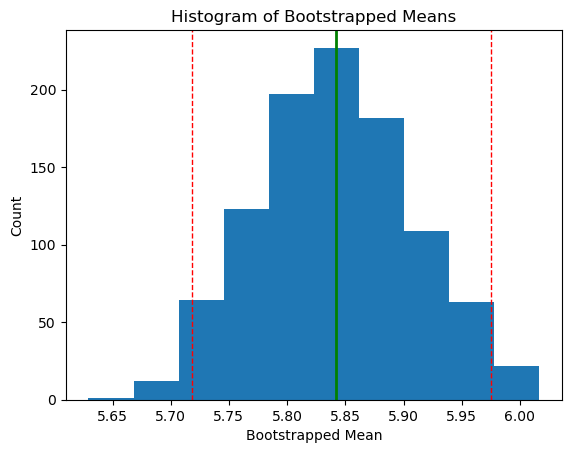

In [129]:
#Complete this
'''
The histogram shows the count of bootstrapped means. The bootstrapped means has a slight negative skew

'''

# Create a figure and axis
fig, ax = plt.subplots()

# Create the histogram
#Add your code here
plt.hist(bootstrap_mean_array)
# Add a title
#Add your code here
plt.title('Histogram of Bootstrapped Means')

# Add a label to the x-axis
#Add your code here
plt.xlabel('Bootstrapped Mean')
# Add a label to the y-axis
#Add your code here
plt.ylabel('Count')

# plot confidence interval and mean of bootstrapped samples
# # Calculate the 95% confidence interval
# ci_lower, ci_upper = np.percentile(bootstrap_mean_array, [2.5, 97.5])

# plt.axvline(ci_lower, color='r', linestyle='dashed', linewidth=1, label=f'95% CI lower bound: {ci_lower:.2f}')
# plt.axvline(ci_upper, color='r', linestyle='dashed', linewidth=1, label=f'95% CI upper bound: {ci_upper:.2f}')
# plt.axvline(bootstrap_mean_array.mean(), color='g', linestyle='solid', linewidth=2, label=f'Original mean: {original_mean:.2f}')

# Show the plot
plt.show()

_(x)_ Given your bootstrapped analysis, what do you recommend to shipping company? 

In [112]:
# Write your answer here
''' 
Iris length is 5.83 on average. With 95% of petal length falling between 5.72 and 5.97.
The actual size chosen for shipping will depend on the how much risk you want to take with space allotment.
By going with 5.97 as the standard length, you would be able to store approximately 95% of the flowers. There may be some flowers that require additional space 
due to the flowers having an extraordinarily long length.
'''

' \nIris may be 0.758 in length on average, with 95% of petal length falling between 0.697 and 0.82. \nThe actual size chosen for shipping with depend on the how much risk you want to take with space allotment. \nBy going with 0.82 as the standard length, you would be able to store 95% of the flowers. There may be some flowers that require additional space \ndue to the flowers having an extraordinarily long length.\n'

# Criteria

|Criteria            |Complete           |Incomplete          |
|--------------------|---------------|--------------|
|Bootstrapping|All steps are done correctly and the answers are correct.|At least one step is done incorrectly leading to a wrong answer.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.


### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_3.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applying_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
